# Utiliser un langage de programmation pour effectuer le bilan énergétique d’un système en mouvement.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Calcul du vecteur vitesse
vx[i] = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1])

vy[i] = (y[i+1] - y[i-1]) / (t[i+1] - t[i-1])

On donne les valeurs suivantes "aux extrémités" :

vx[0] = (x[1] - x[0]) / (t[1] - t[0])

vx[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])

In [2]:
def vitesse(x, y, t):
    """ calcul des coordonnées de v """
    vx = [(x[1] - x[0]) / (t[1] - t[0])]
    for i in range(1, len(x)-1):
        vx.append((x[i+1] - x[i-1]) / (t[i+1] - t[i-1]))
    vx.append((x[-1] - x[-2]) / (t[-1] - t[-2]))

    vy = [(y[1] - y[0]) / (t[1] - t[0])]
    for i in range(1, len(y)-1):
        vy.append((y[i+1] - y[i-1]) / (t[i+1] - t[i-1]))
    vy.append((y[-1] - y[-2]) / (t[-1] - t[-2]))
    return vx, vy

# Mouvement parabolique (théorie)
On considère une bille lancée d'une hauteur h, avec un angle alpha par rapport à l'horizontale, et une vitesse intiale v0.

In [3]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8
# masse (kg)
m = 1 

In [4]:
# création des instants
t = np.linspace(0, 3, 30)

In [5]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

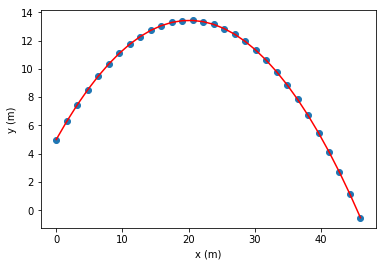

In [6]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')

### Calcul des énergies cinétique, potentielle et mécanique
Ec = 0.5 * m * v^2

Ep = m * g * y

Em = Ec + Ep

In [7]:
def Ep(y, t, m):
    return m * g * y

def Ec(x, y, t, m):
    vx, vy = vitesse(x, y, t)
    # vx, vy sont des listes, à convertir éventuellement en np.array()
    v = np.sqrt(np.array(vx)**2 + np.array(vy)**2)
    return 0.5*m*v**2

def Em(x, y, t, m):
    return Ec(x, y, t, m) + Ep(y, t, m)

In [8]:
ec, ep, em = Ec(x, y, t, m), Ep(y, t, m), Em(x, y, t, m)

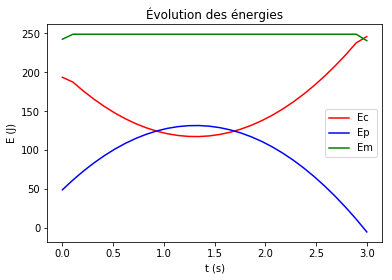

In [9]:
plt.plot(t, ec, 'red', label='Ec')
plt.plot(t, ep, 'blue', label='Ep')
plt.plot(t, em, 'green', label='Em')

plt.xlabel('t (s)')
plt.ylabel('E (J)')

plt.title('Évolution des énergies')
plt.legend()